<p style="text-align:center">
    <a href="https://www.linkedin.com/company/mt-learners/?viewAsMember=true" target="_blank">
    <img src="https://github.com/Mr-MeerMoazzam/Mr-MeerMoazzam/blob/main/Untitled-2.jpg?raw=true" width="150" alt="MT Learners"  />
    </a>
</p>

# importing libraires

In [34]:
import matplotlib.pyplot as plt  # for ploting the data
import pandas as pd    #  for loading the dataset
import seaborn as sns
import numpy as np     # for scientific computing
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

# reading the data

In [5]:
data=pd.read_csv("D:\FuelConsumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# plotting the data wwith one feature

# droping the data

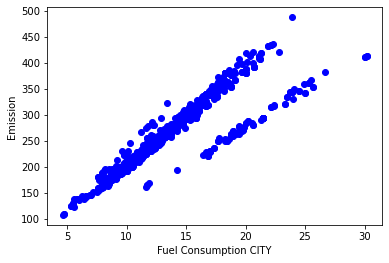

In [13]:
plt.scatter(X.FUELCONSUMPTION_CITY, Y,  color='blue')
plt.xlabel("Fuel Consumption CITY")
plt.ylabel("Emission")
plt.show()

In [10]:
X=data.drop(["MODELYEAR","CO2EMISSIONS","MAKE","MODEL","VEHICLECLASS","FUELTYPE","TRANSMISSION"],axis=1)
X.head()
Y=data["CO2EMISSIONS"]
Y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

# seprating the training and testing data

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7)

### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 70% of the entire dataset will be used for training and 30% for testing.

fitting the model

In [35]:
x_train=X_train[['ENGINESIZE']]
x_test=X_test[['ENGINESIZE']]

## Polynomial Regression
One of the machine learning techniques used for prediction is polynomial regression. For instance, it is frequently used to forecast the rate at which COVID-19 and other infectious diseases would spread.If your data points clearly will not fit a linear regression (a straight line through all data points), it might be ideal for polynomial regression. Similar to linear regression, polynomial regression seeks the optimal path across the data points by utilising the relationship between the variables x and y.

Python has methods for finding a relationship between data-points and to draw a line of polynomial regression. We will show you how to use these methods instead of going through the mathematic formula. PolynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
x_poly

array([[ 1.  ,  4.7 , 22.09],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  4.6 , 21.16],
       ...,
       [ 1.  ,  1.8 ,  3.24],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  5.3 , 28.09]])

In [43]:
model= LinearRegression()
model.fit(train_x_poly, Y_train)
test_x_poly = poly.transform(x_test)

y_pred=model.predict(test_x_poly)
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [ 0.         48.83951347 -1.22121749]
Intercept:  109.85937238308551


Coefficient and Intercept are the parameters of the fitted line. Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

# Prediction

In [45]:


mse = mean_squared_error(Y_test, y_predict)
mae = mean_absolute_error(Y_test, y_predict)
score=r2_score(Y_test, y_predict)
# display
print("Mean absolute error : " + str(mae))
print("Mean squared error : " + str(mse))
print("r2_score : " + str(score))

Mean absolute error : 12.909289822284506
Mean squared error : 361.7451645931391
r2_score : 0.9004786537507449


### ploting the model

Text(0, 0.5, 'Emission')

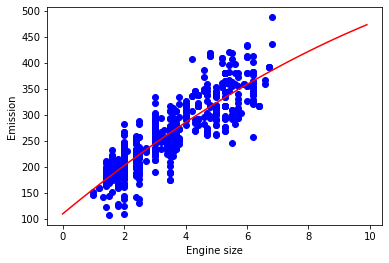

In [70]:
plt.scatter(X_train.ENGINESIZE, Y_train,  color='blue')
XX = np.arange(0.0, 10.0, 0.3)
yy = model.intercept_+ model.coef_[1]*XX+ model.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, 'r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

### ploting the actual vs predicted

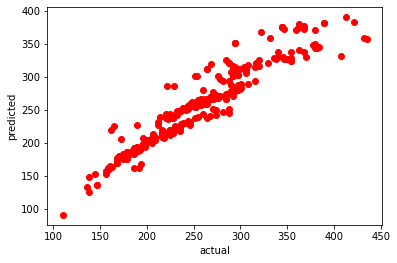

In [71]:

plt.scatter( Y_test, y_predict, color='r')
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

## Thank You
## Author

<a href="https://www.linkedin.com/in/muhammad-bilal-afzal-95b33323b/">MUHAMMAD BILAL</a>

<div data-mime-type="text/markdown" class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput">
<hr>

<h2></h2><h3 align="center"> © <a href="https://www.linkedin.com/company/mt-learners/">MT Learners</a> 2022. All rights reserved. </h3><h3></h3>

</div>